In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [4]:
df['Currency Pair']

0        USD/INR
1        USD/INR
2        USD/INR
3        USD/INR
4        USD/INR
          ...   
18233    GBP/INR
18234    GBP/INR
18235    GBP/INR
18236    GBP/INR
18237    GBP/INR
Name: Currency Pair, Length: 18238, dtype: object

In [5]:
eur_inr = df.loc[df['Currency Pair']=='EUR/INR']
eur_inr.reset_index(drop=True,inplace=True)


In [6]:
import swing_technical_indicators 

In [7]:
print(dir(swing_technical_indicators))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


In [8]:
eur_inr['Date']= pd.to_datetime(eur_inr['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\2606171424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['Date']= pd.to_datetime(eur_inr['Date'])


In [9]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in eur_inr.columns : 
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(eur_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.871375
p-value: 0.992705
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.160348
p-value: 0.690416
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.270712
p-value: 0.642463
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -0.983390
p-value: 0.759274
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).
    
    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')
    
    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal
    
    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(eur_inr, col, period=14)  # Adjust the period as needed
    eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\1720702640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [11]:
eur_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684
...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909


## EMA 100 Feature 

In [12]:
eur_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 100)
eur_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\3257948380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 100)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227
...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923


## EMA 200 

In [13]:
eur_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(eur_inr, 'Closing_price', 200)
eur_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\1721681082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(eur_inr, 'Closing_price', 200)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729
...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569


## EMA 50 

In [14]:
eur_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 50)
eur_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\2256675651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(eur_inr, 'Closing_price', 50)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471


## RSI Feature 

In [15]:
eur_inr['RSI'] = swing_technical_indicators.calculate_rsi(eur_inr,'Closing_price',21)
eur_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\648986798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eur_inr['RSI'] = swing_technical_indicators.calculate_rsi(eur_inr,'Closing_price',21)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000,0.000000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647,0.000000
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743,0.000000
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734,0.000000
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926,31.002374
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725,22.088720
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049,32.043599
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471,33.606593


In [16]:
import plotly.express as px 
px.line(eur_inr['RSI'])

## MACD

In [17]:
eur_inr_macd = swing_technical_indicators.calculate_macd(eur_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in eur_inr_macd.columns:

    eur_inr[f"{i}"] = eur_inr_macd[f'{i}']

eur_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_5436\159475514.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-10-29,77.3420,77.6820,77.1330,77.3450,EUR/INR,77.696572,77.134137,77.349787,77.345000,77.345000,77.345000,0.000000,0.000000,0.000000,0.000000
1,2014-10-30,77.3930,77.3930,76.6710,77.3870,EUR/INR,77.433721,76.684978,77.401645,77.345832,77.345418,77.346647,0.000000,0.003350,0.000670,0.002680
2,2014-11-02,76.8270,76.8270,76.4510,76.2016,EUR/INR,76.859586,76.464467,76.833644,77.323174,77.334037,77.301743,0.000000,-0.088625,-0.017189,-0.071436
3,2014-11-03,76.6490,77.0910,76.5460,76.6640,EUR/INR,77.138877,76.594128,76.685109,77.310121,77.327370,77.276734,0.000000,-0.122788,-0.038309,-0.084480
4,2014-11-04,76.8540,77.0790,76.5650,76.8610,EUR/INR,77.126343,76.605891,76.909684,77.301227,77.322729,77.260430,0.000000,-0.132440,-0.057135,-0.075305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2024-10-24,90.9300,91.0520,90.8320,90.9200,EUR/INR,91.066572,90.833137,90.937787,91.548324,90.889287,91.870926,31.002374,-0.536265,-0.428964,-0.107301
2605,2024-10-27,90.0043,90.9370,90.0043,90.0043,EUR/INR,90.977721,90.018278,90.012945,91.517749,90.880481,91.797725,22.088720,-0.587293,-0.460630,-0.126663
2606,2024-10-28,90.9030,90.9430,90.4410,90.8880,EUR/INR,90.975586,90.454467,90.909644,91.505279,90.880556,91.762049,32.043599,-0.550084,-0.478521,-0.071564
2607,2024-10-29,90.9158,91.0241,90.9158,90.9823,EUR/INR,91.071977,90.963928,90.951909,91.494923,90.881569,91.731471,33.606593,-0.507141,-0.484245,-0.022896


## Bollinger Bands 

In [18]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(eur_inr['Closing_price'])

eur_inr = eur_inr.join(bollinger_data)
eur_inr.drop('Price',axis=1, inplace=True)

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [19]:

X1 = eur_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =eur_inr['Closing_price']

## Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X= pd.DataFrame(X,columns = X1.columns)

## Supervised ML Models 

In [26]:
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}

        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
        # Fit the model
    rf.fit(X_train, y_train)
        
        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    rf_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

    print("\nRandom Forest Metrics :", rf_metrics)
        
random_forest_model(X,y)

Mean Absolute Error : 0.14027835249041995
Mean Squared Error : 0.06444705603894353
Mean Absolute Percentage Error : 0.17614460245491%
R-squared (R^2): 0.9985994527374381 

Random Forest Metrics : {'MAE': 0.14027835249041995, 'MSE': 0.06444705603894353, 'MAPE': 0.17614460245491, 'R^2': 0.9985994527374381}


## SVM 

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# SVM Model
def svm_model(X, y):
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Added random_state for reproducibility
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    svm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    
    # Return the metrics
    return svm_metrics

# Example call with your data
svm_metrics = svm_model(X, y)
print("\nSVM Metrics:", svm_metrics)


Mean Absolute Error : 0.1894418150809663
Mean Squared Error : 0.07672471123345387
Mean Absolute Percentage Error : 0.2368096289004776%
R-squared (R^2): 0.9983121392349064 

SVM Metrics: {'MAE': 0.1894418150809663, 'MSE': 0.07672471123345387, 'MAPE': 0.2368096289004776, 'R^2': 0.9983121392349064}


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV


def svm_model_with_hyperparameter_tuning(X,y):
    
    
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")
    
    # Get the best model
    best_svm = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    svm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

# Return the metrics for all currency pairs
    print("\nSVM Metrics :", svm_metrics)
  
svm_model_with_hyperparameter_tuning(X,y)

Best Hyperparameters : {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Absolute Error : 0.13567337312380362
Mean Squared Error : 0.04411397857101847
R-squared (R^2): 0.9989783891258636 

SVM Metrics : {'MAE': 0.13567337312380362, 'MSE': 0.04411397857101847, 'R^2': 0.9989783891258636}


## Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting_model(X,y):
    
    gb = GradientBoostingRegressor()
    gb_metrics = {}

    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        # Train the model
    gb.fit(X_train, y_train)
    
    # Predict
    y_pred = gb.predict(X_test)
    
    # Calculate metrics
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    gb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    print("\nGradient Boosting Metrics ", gb_metrics)


gradient_boosting_model(X,y)

Mean Absolute Error : 0.18048142967051062
Mean Squared Error : 0.0731009885190971
Mean Absolute Percentage Error : 0.22519883264268734%
R-squared (R^2): 0.9984560115179378 

Gradient Boosting Metrics  {'MAE': 0.18048142967051062, 'MSE': 0.0731009885190971, 'MAPE': 0.22519883264268734, 'R^2': 0.9984560115179378}


## KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    knn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

    
    print("\nKNN Metrics for each currency pair:", knn_metrics)
    
 
knn_model(X,y)

Mean Absolute Error : 0.2590877905491696
Mean Squared Error : 0.13359424039795617
Mean Absolute Percentage Error : 0.32448639364290255%
R-squared (R^2): 0.9971093028886808 

KNN Metrics for each currency pair: {'MAE': 0.2590877905491696, 'MSE': 0.13359424039795617, 'MAPE': 0.32448639364290255, 'R^2': 0.9971093028886808}


## XGBoost

In [26]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 508.4 kB/s eta 0:04:06
   ---------------------------------------- 0.1/124.9 MB 508.4 kB/s eta 0:04:06
   ---------------------------------------- 0.1/124.9 MB 508.4 kB/s eta 0:04:06
   ---------------------------------------- 0.1/124.9 MB 290.5 kB/s eta 0:07:10
   ---------------------------------------- 0.1/124.9 MB 290.5 kB/s eta 0:07:10
   ---------------------------------------- 0.1/124.9 MB 300.4 kB/s eta 0:06:56
   ---------------------------------------- 0.2/124.9 MB 374.1 kB/s eta 0:05:34
   -----------

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    xgb.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb.predict(X_test)
    
    # Calculate metrics
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    xgb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}


    print("\nXGBoost Metrics :", xgb_metrics)
    


xgboost_model(X,y)

Mean Absolute Error : 0.16851548348886017
Mean Squared Error : 0.07086283946628343
Mean Absolute Percentage Error : 0.21143727863427017%
R-squared (R^2): 0.9984727737513277 

XGBoost Metrics : {'MAE': 0.16851548348886017, 'MSE': 0.07086283946628343, 'MAPE': 0.21143727863427017, 'R^2': 0.9984727737513277}


## Light BGM

In [28]:
pip install lightgbm

  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)

    

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    lgbm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    print("\nlgbm Metrics :", lgbm_metrics)
# Example usage
lightgbm_model(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2087, number of used features: 13
[LightGBM] [Info] Start training from score 80.968565
Mean Absolute Error : 0.18196127330796089
Mean Squared Error : 0.07245482851263553
Mean Absolute Percentage Error : 0.22822764024725942%
R-squared (R^2): 0.9983880667283119 

lgbm Metrics : {'MAE': 0.18196127330796089, 'MSE': 0.07245482851263553, 'MAPE': 0.22822764024725942, 'R^2': 0.9983880667283119}


## CatBoost

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000, 
        learning_rate=0.1, 
        depth=10, 
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )

    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    cb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    print("\nCatBoost Metrics :", cb_metrics)
# Example usage
catboost_model(X,y)


Mean Absolute Error : 7.735165852233185
Mean Squared Error : 89.89351976362865
Mean Absolute Percentage Error : 9.509405367771047%
R-squared (R^2): -0.9682322657445528 

CatBoost Metrics : {'MAE': 7.735165852233185, 'MSE': 89.89351976362865, 'MAPE': 9.509405367771047, 'R^2': -0.9682322657445528}


## Linear Regression

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R^2): {r2} ")
    
lr_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nlinearregression Metrics :", lr_metrics)

Mean Absolute Error : 0.14375472623765673
Mean Squared Error : 0.04595809599449019
Mean Absolute Percentage Error : 0.18010850948232607%
R-squared (R^2): 0.9989538835635465 

linearregression Metrics : {'MAE': 0.14375472623765673, 'MSE': 0.04595809599449019, 'MAPE': 0.18010850948232607, 'R^2': 0.9989538835635465}


## MLP regressor

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

# Evaluate the model performance
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R^2): {r2} ")
    
mlp_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

print("\nmlp metrics :", mlp_metrics)

Mean Absolute Error : 0.17983545042405452
Mean Squared Error : 0.059026482801842355
Mean Absolute Percentage Error : 0.22479355605316323%
R-squared (R^2): 0.9986564157520267 

mlp metrics : {'MAE': 0.17983545042405452, 'MSE': 0.059026482801842355, 'MAPE': 0.22479355605316323, 'R^2': 0.9986564157520267}


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Opti

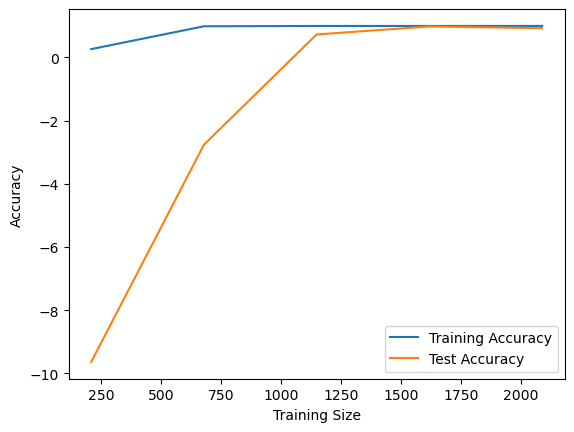

In [26]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# deep learning models

## RNN

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1663 - mae: 0.2817 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mae: 0.0798 - val_loss: 0.0011 - val_mae: 0.0262
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mae: 0.0605 - val_loss: 0.0012 - val_mae: 0.0279
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - mae: 0.0539 - val_loss: 0.0018 - val_mae: 0.0353
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0041 - mae: 0.0481 - val_loss: 8.2860e-04 - val_mae: 0.0225
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040 - mae: 0.0473 - val_loss: 7.3145e-04 - val_mae: 0.0210
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030 - mae: 0.0419 - val_loss: 9.2828e-04 - val_mae: 0.0236
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027 - mae: 0.0400 - val_loss: 0.0011 - val_mae: 0.0259
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step -

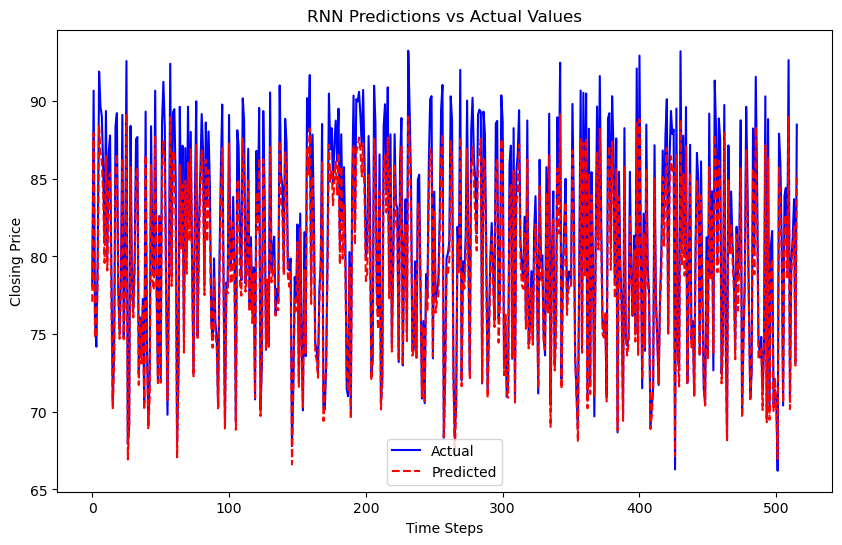

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X= X.select_dtypes('number').values
# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

rnn_metrics = {}
rnn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nRNN metrics :", rnn_metrics)
# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# LSTM

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1276 - mae: 0.2527 - val_loss: 0.0014 - val_mae: 0.0292
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0067 - mae: 0.0622 - val_loss: 0.0029 - val_mae: 0.0444
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mae: 0.0503 - val_loss: 0.0059 - val_mae: 0.0662
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0035 - mae: 0.0430 - val_loss: 0.0049 - val_mae: 0.0588
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 - mae: 0.0377 - val_loss: 0.0056 - val_mae: 0.0631
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - mae: 0.0352 - val_loss: 0.0035 - val_mae: 0.0496
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021 - mae: 0.0333 - val_loss: 0.0057 - val_mae: 0.0638
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017 - mae: 0.0291 - val_loss: 0.0095 - val_mae: 0.0826
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.001

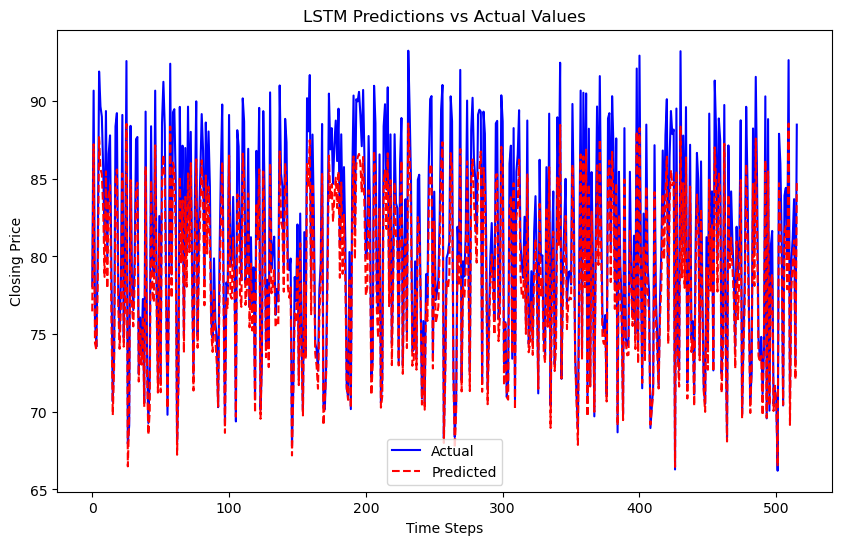

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

lstm_metrics = {}
lstm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}


print("\nlstm metrics :", lstm_metrics)
# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# GRU

Epoch 1/20


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1248 - mae: 0.2445 - val_loss: 0.0024 - val_mae: 0.0395
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0070 - mae: 0.0644 - val_loss: 0.0026 - val_mae: 0.0419
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0051 - mae: 0.0534 - val_loss: 0.0028 - val_mae: 0.0431
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037 - mae: 0.0466 - val_loss: 0.0052 - val_mae: 0.0637
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mae: 0.0412 - val_loss: 0.0055 - val_mae: 0.0640
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0026 - mae: 0.0378 - val_loss: 0.0056 - val_mae: 0.0645
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0023 - mae: 0.0355 - val_loss: 0.0071 - val_mae: 0.0765
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0084 - val_mae: 0.0820
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0018 - mae: 0.

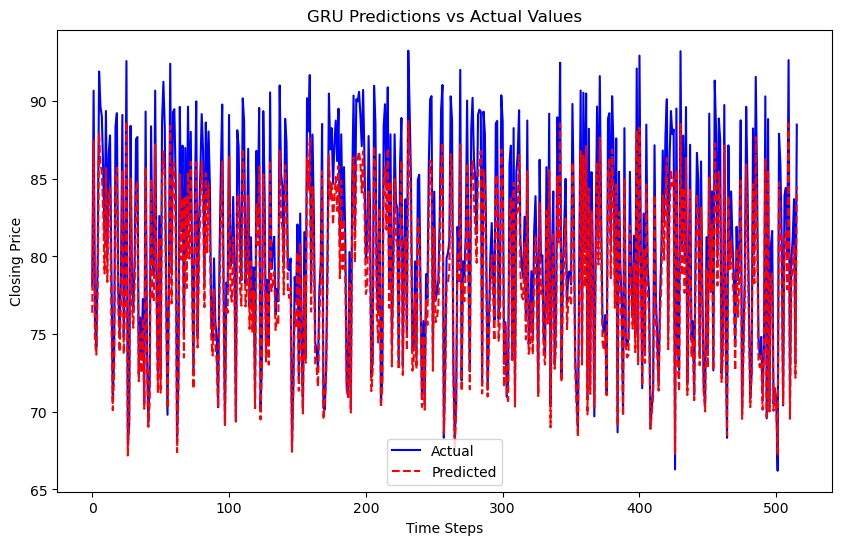

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = gru_model.evaluate(X_train, y_train)
test_loss, test_mae = gru_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_gru_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_gru_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

gru_metrics = {}
gru_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nGRU metrics :", gru_metrics)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("GRU Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# cnn

Epoch 1/20


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0426 - mae: 0.1496 - val_loss: 0.0019 - val_mae: 0.0332
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mae: 0.0578 - val_loss: 0.0016 - val_mae: 0.0307
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0496 - val_loss: 0.0017 - val_mae: 0.0329
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0414 - val_loss: 0.0011 - val_mae: 0.0261
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mae: 0.0338 - val_loss: 7.9770e-04 - val_mae: 0.0219
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 8.1445e-04 - val_mae: 0.0219
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 8.2156e-04 - val_mae: 0.0227
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mae:

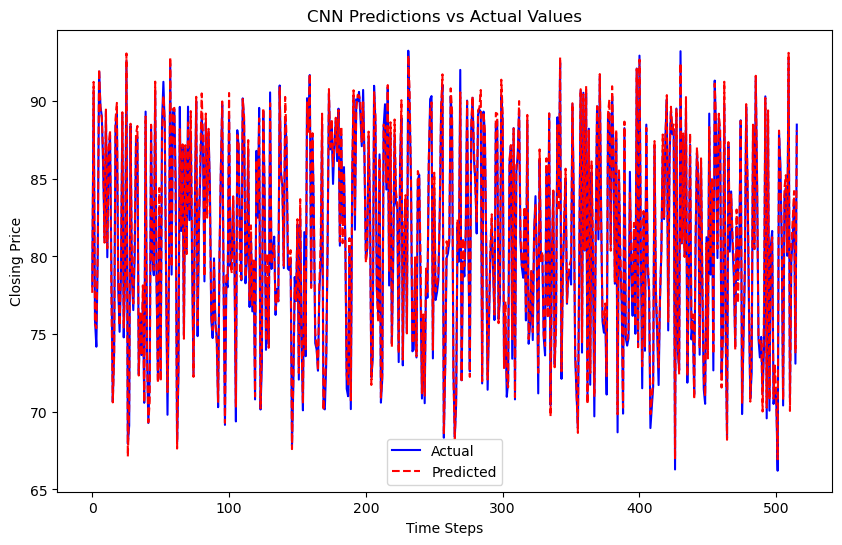

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_cnn_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_cnn_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")


cnn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\ncnn metrics :", cnn_metrics)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# cnn -lstm

Epoch 1/20


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0511 - mae: 0.1455 - val_loss: 0.0016 - val_mae: 0.0319
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - mae: 0.0413 - val_loss: 0.0048 - val_mae: 0.0573
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0077 - val_mae: 0.0764
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0063 - val_mae: 0.0686
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0076 - val_mae: 0.0748
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0079 - val_mae: 0.0763
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0106 - val_mae: 0.0890
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4867e-04 - mae: 0.0242 - val_loss: 0.0075 - val_mae: 0.0760
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - mae: 0.027

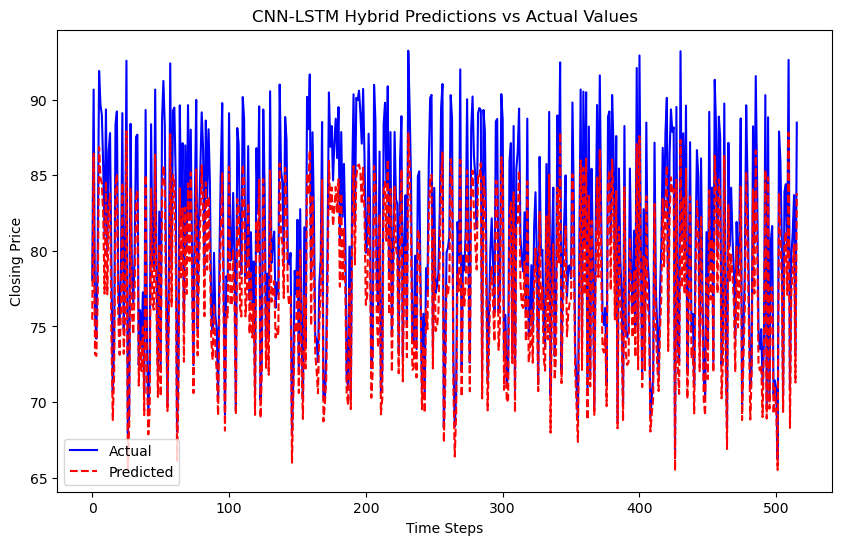

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in eur_inr.columns if col not in ['Date', target]]

# Separate X and y
X = eur_inr[features]
y = eur_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, R2
mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_cnn_lstm_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

cnn_lstm_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\ncnn-lstm metrics :", cnn_lstm_metrics)


# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN-LSTM Hybrid Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


# sarima

c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 4.17
Mean Squared Error (MSE): 24.02
Mean Absolute Percentage Error : 4.643371320914195%
R-squared (R²): -4.99

sarima metrics : {'MAE': 4.17467306362393, 'MSE': 24.015332287686036, 'MAPE': 4.643371320914195, 'R^2': -4.991936396319726}


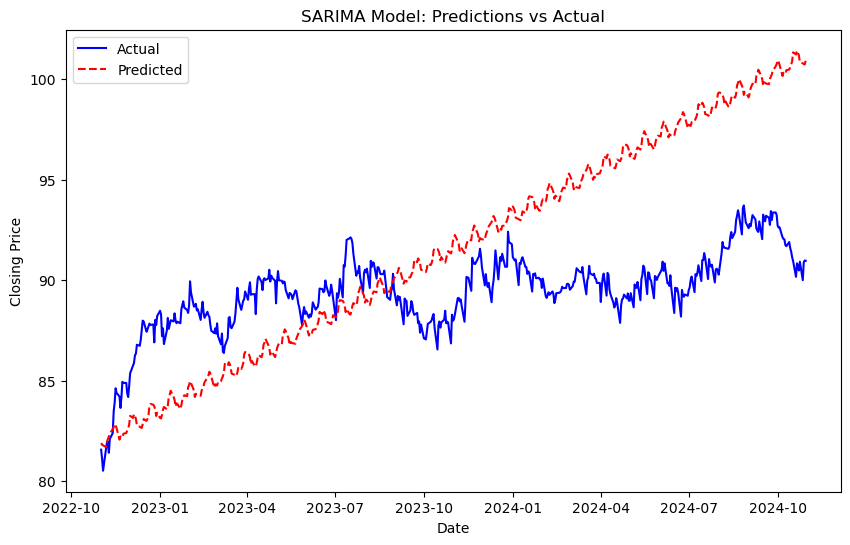

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2087
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 14)   Log Likelihood               -1664.924
Date:                            Sat, 30 Nov 2024   AIC                           3341.849
Time:                                    17:17:17   BIC                           3375.620
Sample:                                         0   HQIC                          3354.232
                                           - 2087                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric -1.275e-06   2.37e-07     -5.390      0.000   -1.74e-06   -8.12e-07
ar.L1            0.1897      

In [43]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assume jpy_inr is your DataFrame with the 'Date' column and target 'Closing_price'
# Ensure 'Date' is in datetime format
eur_inr['Date'] = pd.to_datetime(eur_inr['Date'])

# Convert 'Date' to numeric (timestamp)
eur_inr['Date_numeric'] = eur_inr['Date'].apply(lambda x: x.timestamp())

# Set the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(eur_inr) * 0.8)
train, test = eur_inr[:train_size], eur_inr[train_size:]

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(1, 1, 1),  # AR, I, MA order
                       seasonal_order=(1, 1, 1, 14),  # Seasonal order
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])


# Calculate evaluation metrics
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
mape = mean_absolute_percentage_error(test[target], predictions)
r2 = r2_score(test[target], predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R²): {r2:.2f}")
sarima_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\nsarima metrics :", sarima_metrics)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



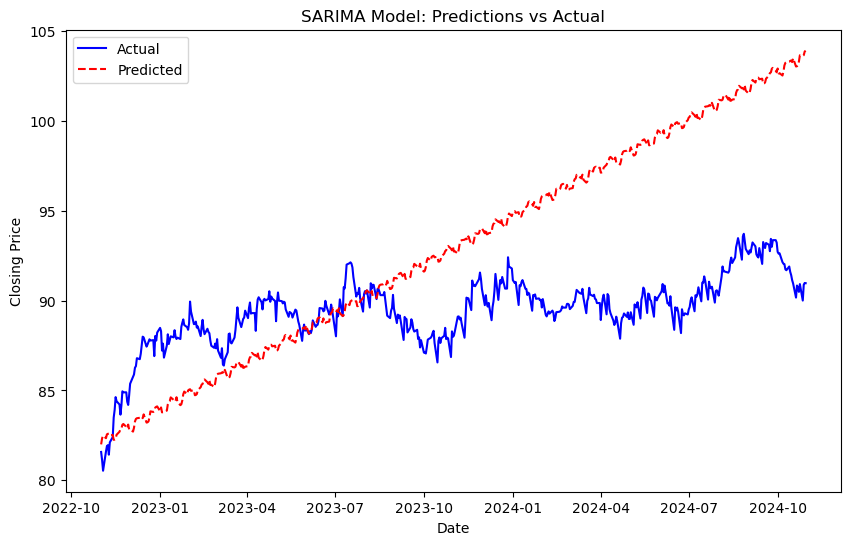

Mean Absolute Error (MAE): 5.03
Mean Squared Error (MSE): 37.50
Mean Absolute Percentage Error : 5.5907057660526%
R-squared (R²): -8.36

hperparametertuned_sarima metrics : {'MAE': 5.03302654507111, 'MSE': 37.49913340373956, 'MAPE': 5.5907057660526, 'R^2': -8.356207092230322}


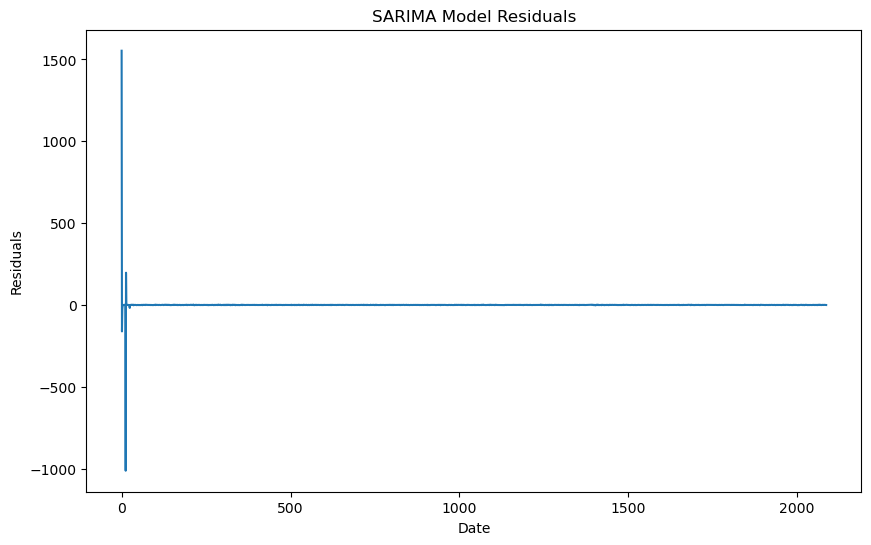

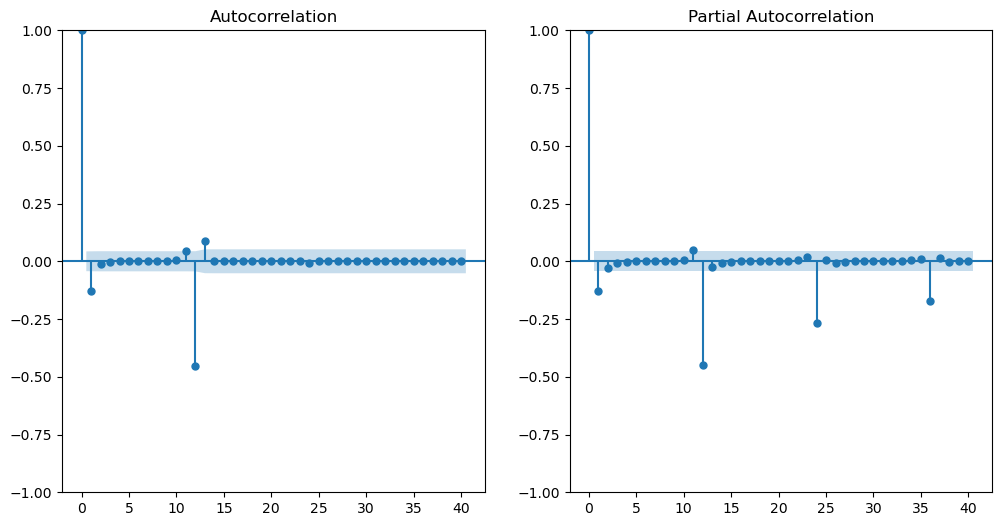

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2087
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1656.565
Date:                            Sat, 30 Nov 2024   AIC                           3325.130
Time:                                    17:18:15   BIC                           3358.912
Sample:                                         0   HQIC                          3337.515
                                           - 2087                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric -1.043e-06   2.38e-07     -4.378      0.000   -1.51e-06   -5.76e-07
ar.L1            0.3123      

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Ensure 'Date' is in datetime format
eur_inr['Date'] = pd.to_datetime(eur_inr['Date'])

# Convert 'Date' to numeric (timestamp)
eur_inr['Date_numeric'] = eur_inr['Date'].apply(lambda x: x.timestamp())

# Define the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(eur_inr) * 0.8)
train, test = eur_inr[:train_size], eur_inr[train_size:]

# Hyperparameters for SARIMA
p, d, q = 1, 1, 1  # AR, I, MA order
P, D, Q, S = 1, 1, 1, 12  # Seasonal AR, I, MA order, and period

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, S), 
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Evaluate the model with RMSE

# Calculate evaluation metrics
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
mape = mean_absolute_percentage_error(test[target], predictions)
r2 = r2_score(test[target], predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R²): {r2:.2f}")
hsarima_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\nhperparametertuned_sarima metrics :", hsarima_metrics)


# Plot residuals to check for patterns
residuals = sarima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


# fb prophet

In [34]:
pip install prophet

  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached holidays-0.61-py3-none-any.whl.metadata (26 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
Using cached holidays-0.61-py3-none-any.whl (1.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Calculate MAE, MSE, for the train and test sets
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2=r2_score(actual,predicted)
    
    return mae, mse, mape, r2

In [46]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = eur_inr  # Replace this with your data
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)
df.dropna(inplace=True)

# Add the 'cap' column for logistic growth (set it to the max of 'y')
df['cap'] = df['y'].max()

# Define regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
    'Lower Band'
]

# Ensure all regressors are present in the data
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Set up the hyperparameters grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1, 10, 20],
    'holidays_prior_scale': [10, 15, 20],
    'changepoint_range': [0.8, 0.9],
    'growth': ['linear', 'logistic']  # Will test both linear and logistic growth
}

# Initialize variables to store the best model and best score
best_model = None
best_score = float('inf')
best_params = {}



# Grid Search Loop
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for changepoint_range in param_grid['changepoint_range']:
                for growth in param_grid['growth']:
                    # Initialize Prophet with the current set of hyperparameters
                    prophet_model = Prophet(
                        changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        holidays_prior_scale=holidays_prior_scale,
                        changepoint_range=changepoint_range,
                        growth=growth
                    )
                    
                    # Add regressors to the model
                    for regressor in regressors:
                        prophet_model.add_regressor(regressor)
                    
                    # Train the model
                    if growth == 'logistic':
                        prophet_model.fit(train[['ds', 'y', 'cap'] + regressors])
                    else:
                        prophet_model.fit(train[['ds', 'y'] + regressors])
                    
                    # Create a future dataframe for predictions
                    future = prophet_model.make_future_dataframe(periods=len(test))
                    
                    # Add regressor values to the future dataframe
                    for regressor in regressors:
                        future[regressor] = df[regressor]
                    
                    # Add the 'cap' column for logistic growth
                    if growth == 'logistic':
                        future['cap'] = df['cap'].iloc[0]  # Constant value
                    
                    # Make predictions
                    forecast = prophet_model.predict(future)
                    
                    # Evaluate model performance on the test set
                    test_yhat = forecast['yhat'][-len(test):].values
                    
                    
                    # If the model has better performance, store it
                    if mse < best_score:
                        best_score = mse
                        best_model = prophet_model
                        best_params = {
                            'changepoint_prior_scale': changepoint_prior_scale,
                            'seasonality_prior_scale': seasonality_prior_scale,
                            'holidays_prior_scale': holidays_prior_scale,
                            'changepoint_range': changepoint_range,
                            'growth': growth
                        }

# Output the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
future = best_model.make_future_dataframe(periods=len(test))
for regressor in regressors:
    future[regressor] = df[regressor]
if best_params['growth'] == 'logistic':
    future['cap'] = df['cap'].iloc[0]

best_forecast = best_model.predict(future)
test_yhat = best_forecast['yhat'][-len(test):].values
mae, mse, mape, r2 = evaluate_model(test['y'].values, test_yhat)




prophet_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nhprophet metrics :", prophet_metrics)


17:20:30 - cmdstanpy - INFO - Chain [1] start processing
17:20:33 - cmdstanpy - INFO - Chain [1] done processing
17:20:34 - cmdstanpy - INFO - Chain [1] start processing
17:20:39 - cmdstanpy - INFO - Chain [1] done processing
17:20:49 - cmdstanpy - INFO - Chain [1] start processing
17:20:50 - cmdstanpy - INFO - Chain [1] done processing
17:20:51 - cmdstanpy - INFO - Chain [1] start processing
17:20:54 - cmdstanpy - INFO - Chain [1] done processing
17:21:03 - cmdstanpy - INFO - Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] done processing
17:21:05 - cmdstanpy - INFO - Chain [1] start processing
17:21:09 - cmdstanpy - INFO - Chain [1] done processing
17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:19 - cmdstanpy - INFO - Chain [1] done processing
17:21:21 - cmdstanpy - INFO - Chain [1] start processing
17:21:24 - cmdstanpy - INFO - Chain [1] done processing
17:21:35 - cmdstanpy - INFO - Chain [1] start processing
17:21:35 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'changepoint_range': 0.8, 'growth': 'linear'}
Best MSE: 37.49913340373956

hprophet metrics : {'MAE': 0.3987342838821825, 'MSE': 0.3467591305937385, 'MAPE': 0.4461079396746536, 'R^2': 0.9134819943163482}


In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
# Ensure your dataset has columns like 'Date', 'Closing_price', 'RSI', 'MACD', etc.
df = eur_inr  # Replace `eur_inr` with your actual dataframe variable
print("Columns in dataset:", df.columns)

# Rename columns as Prophet requires 'ds' (date) and 'y' (target)
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Add 'cap' column for logistic growth (define a realistic upper limit for your target variable)
df['cap'] = df['y'].max() * 1.1  # 10% higher than max value as an example
df['floor'] = 0  # Optionally, add a floor column

# Specify the additional regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band', 'Lower Band'
]

# Ensure all specified regressors are present in the dataset
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Initialize the Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    changepoint_range=best_params['changepoint_range'],
    growth='logistic'  # Ensure logistic growth
)

# Add each regressor to the Prophet model
for regressor in regressors:
    prophet_model.add_regressor(regressor)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Train the model
prophet_model.fit(train[['ds', 'y', 'cap', 'floor'] + regressors])

# Create a future dataframe for predictions
future = prophet_model.make_future_dataframe(periods=len(test))
future['cap'] = df['cap'].iloc[0]  # Use the same cap value for future
future['floor'] = df['floor'].iloc[0]  # Use the same floor value for future

# Add regressors to the future dataframe
for regressor in regressors:
    future[regressor] = df[regressor]

# Make predictions
forecast = prophet_model.predict(future)



# Evaluate on train and test sets
train_forecast = prophet_model.predict(train[['ds', 'cap', 'floor'] + regressors])
train_yhat = train_forecast['yhat'].values
train_metrics = evaluate_model(train['y'].values, train_yhat)

test_forecast = prophet_model.predict(test[['ds', 'cap', 'floor'] + regressors])
test_yhat = test_forecast['yhat'].values


# Print metrics


mae, mse, mape, r2 = evaluate_model(test['y'].values, test_yhat)




prophetn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nprophetn metrics :", prophetn_metrics)
# Plot predictions vs actual values
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot predicted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted', line=dict(color='red')))

# Plot upper and lower bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound',
    line=dict(color='lightgrey', dash='dot')
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound',
    line=dict(color='lightgrey', dash='dot')
))

# Update layout
fig.update_layout(
    title="Prophet with Regressors: Predictions vs Actual",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


Columns in dataset: Index(['ds', 'Open_price', 'Day_high', 'Day_low', 'y', 'Currency Pair',
       'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band', 'Date_numeric', 'cap'],
      dtype='object')


17:34:59 - cmdstanpy - INFO - Chain [1] start processing
17:35:03 - cmdstanpy - INFO - Chain [1] done processing



hprophetn metrics : {'MAE': 0.1500831376756079, 'MSE': 0.04419325678665932, 'MAPE': 0.16820916055765067, 'R^2': 0.9889735781858131}


c:\Users\DELL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Bidirectional- LSTM

In [38]:
pip install tensorflow

In [43]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0583 - mae: 0.1662 - val_loss: 8.1615e-04 - val_mae: 0.0214
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mae: 0.0474 - val_loss: 0.0016 - val_mae: 0.0313
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0391 - val_loss: 0.0014 - val_mae: 0.0294
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0013 - val_mae: 0.0282
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mae: 0.0347 - val_loss: 0.0011 - val_mae: 0.0261
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0339 - val_loss: 0.0024 - val_mae: 0.0417
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0323 - val_loss: 0.0015 - val_mae: 0.0318
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0291 - val_loss: 0.0010 - val_mae: 0.0260
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - 

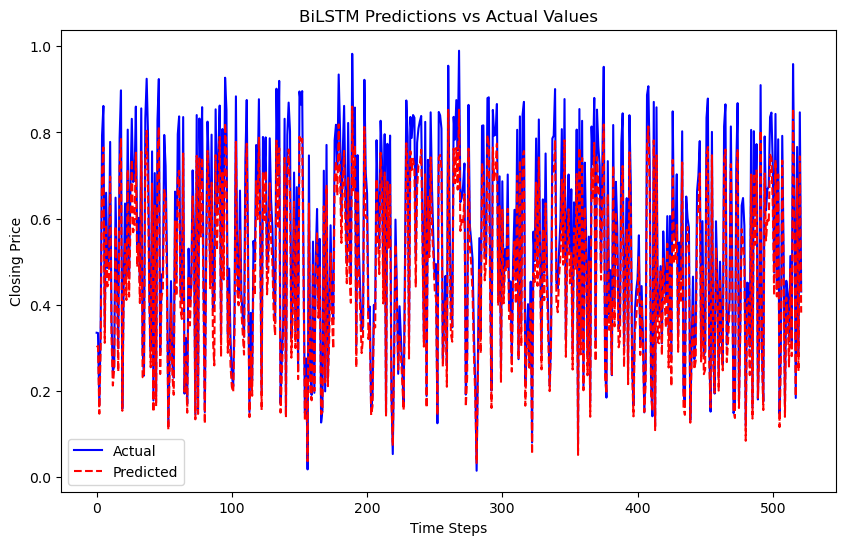

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import *











# Create sequences
sequence_length = 3

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False)),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
#y_pred_rescaled = y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
#y_test_rescaled = y.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae, mse, mape, r2 = evaluate_model(y_test, y_pred)




bilstm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nbilstm metrics :", bilstm_metrics)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("BiLSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


In [55]:
metrics = {
    
    "Linear regression": lr_metrics,
    "MLP": mlp_metrics,
    "RNN": rnn_metrics,
    "lstm": lstm_metrics,
    "GRU": gru_metrics,
    "CNN": cnn_metrics,
    "CNN-LSTM": cnn_lstm_metrics,
    "Sarima": sarima_metrics,
    "Hpt Sarima": hsarima_metrics,
    "FB Prophet": prophet_metrics,
    "hpt FB Prophet": prophetn_metrics,
    "BiLSTM": bilstm_metrics
    
    
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics).T

# Display the DataFrame
print(metrics_df)

                        MAE        MSE       MAPE       R^2
Linear regression  0.143755   0.045958   0.180109  0.998954
MLP                0.179835   0.059026   0.224794  0.998656
RNN                1.433718   3.149423   1.692812  0.931733
lstm               2.090857   5.903176   2.485294  0.872043
GRU                2.102380   5.856927   2.501609  0.873046
CNN                0.509722   0.433652   0.639363  0.990600
CNN-LSTM           2.999632  10.559092   3.618942  0.771122
Sarima             4.174673  24.015332   4.643371 -4.991936
Hpt Sarima         5.033027  37.499133   5.590706 -8.356207
FB Prophet         0.398734   0.346759   0.446108  0.913482
hpt FB Prophet     0.150083   0.044193   0.168209  0.988974
BiLSTM             0.062055   0.004941  12.014768  0.914063
